In [158]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [159]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/regression/automobile.csv', index_col=0)
df.replace('?', np.nan, inplace=True)
df.dropna(subset=['price'],inplace=True)

In [160]:
X, y = df.drop(columns='price'), df['price'].astype('int')
num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(exclude=np.number).columns.tolist()
ord_cols = []
hot_encode_cols = []
for col in X[cat_cols]:
    count = X[col].nunique()
    if count <= 2:
        ord_cols.append(col)
    else:
        hot_encode_cols.append(col)
print(num_cols)
print(ord_cols)
print(hot_encode_cols)

['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg']
['fuel-type', 'aspiration', 'num-of-doors', 'engine-location']
['normalized-losses', 'make', 'body-style', 'drive-wheels', 'engine-type', 'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower', 'peak-rpm']


In [161]:
num_cols = ['symboling', 'wheel-base', 'length', 'width', 'height',
    'curb-weight', 'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg',
    'bore','stroke','horsepower','peak-rpm','normalized-losses',]

hot_encode_cols = ['make', 'body-style', 'drive-wheels',
     'engine-type', 'num-of-cylinders', 'fuel-system']
    
print(f"Number of columns numerical: {len(num_cols)}")
print(f"Number of columns hot encoded: {len(hot_encode_cols)}")

Number of columns numerical: 15
Number of columns hot encoded: 6


In [162]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])

ord_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder()),
])

hot_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='first', sparse_output=False)),
])

# compose the three pipelines
preprocessor = ColumnTransformer([
    ('ord', ord_pipeline, ord_cols),
    ('hot', hot_pipeline, hot_encode_cols),
    ('num', num_pipeline, num_cols),
])

preprocessor

ColumnTransformer(transformers=[('ord',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode', OrdinalEncoder())]),
                                 ['fuel-type', 'aspiration', 'num-of-doors',
                                  'engine-location']),
                                ('hot',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['make', 'body-style', 'drive-wheels',
                                  'engine-type', 'num-of-cylinders',
                                  'fuel-system']),
                                ('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['symboling', 'wheel-base', 'length', 'width',
                                  'height', 'curb-weight', 'engine-size',
                                  'compression-ratio', 'city-mpg',
                                  'highway-mpg', 'bore', 'stroke', 'horsepower',
                                  'peak-rpm', 'normalized-losses'])])

In [163]:
import matplotlib.pyplot as plt

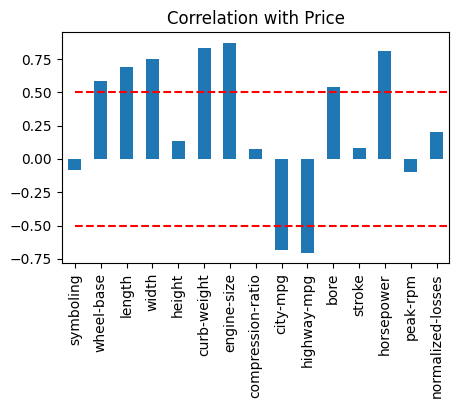

In [164]:
fig = X[num_cols].astype(float).corrwith(y).plot(kind='bar', 
    figsize=(5, 3), title="Correlation with Price")
fig.hlines(.5, 0, 15, linestyles='dashed', colors='r')
fig.hlines(-.5, 0, 15, linestyles='dashed', colors='r')
plt.show()

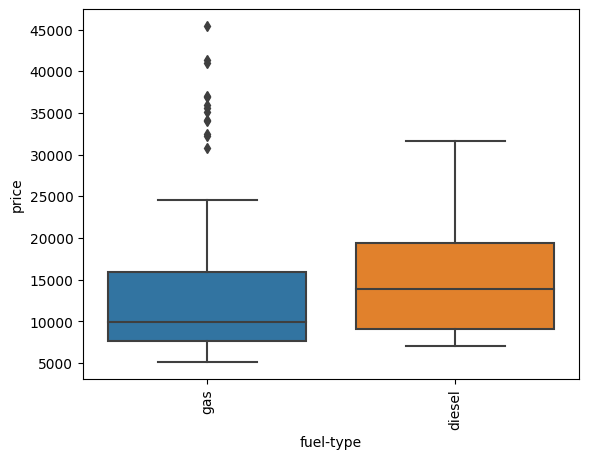

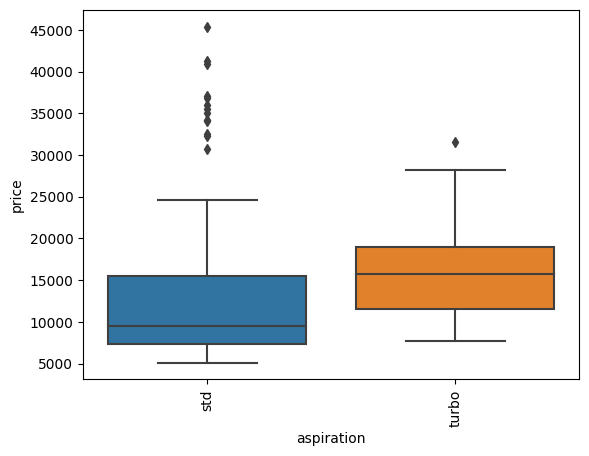

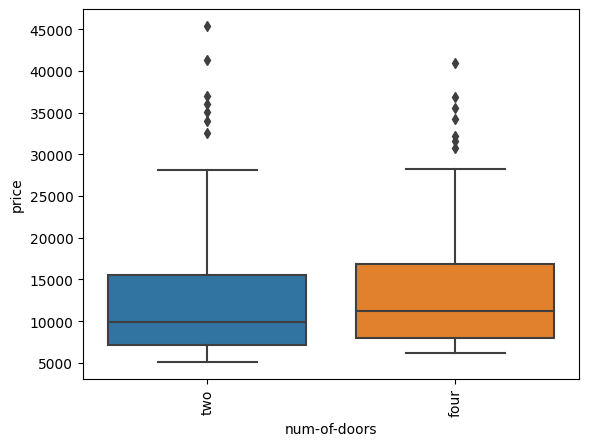

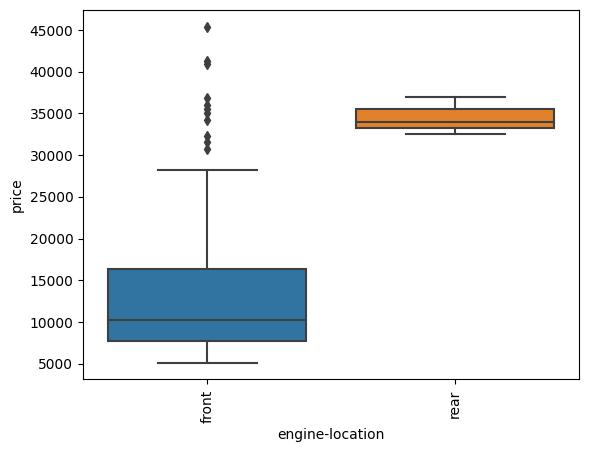

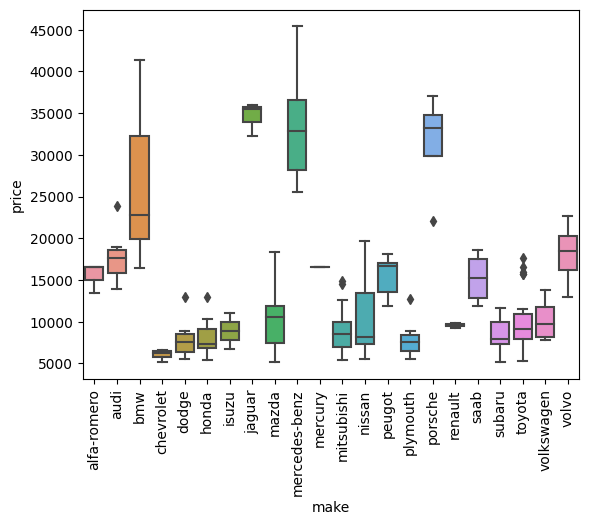

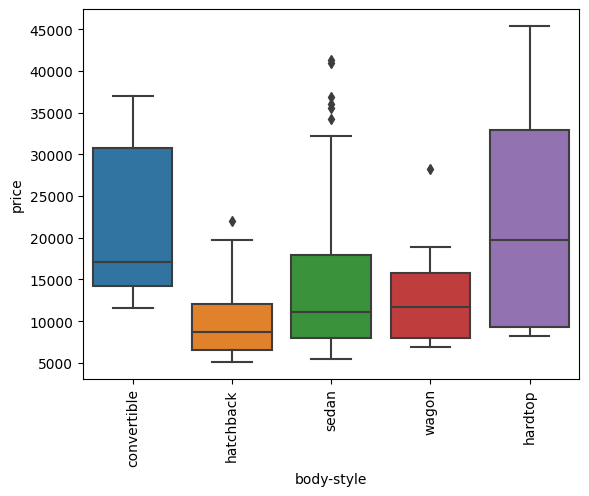

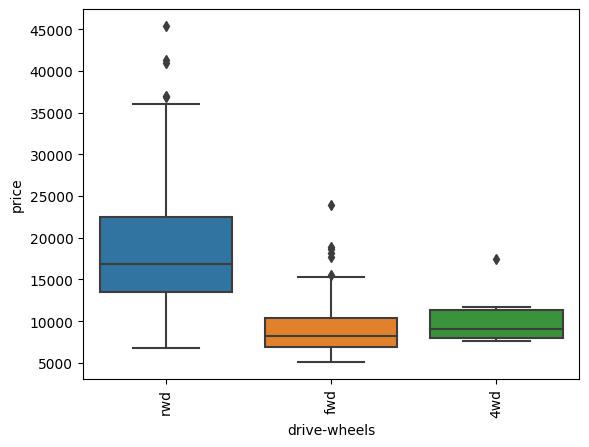

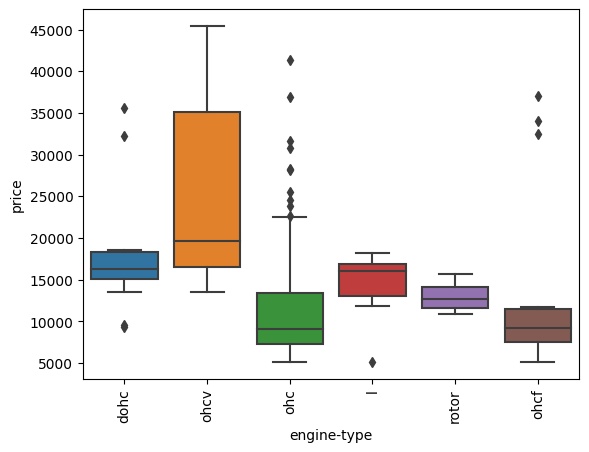

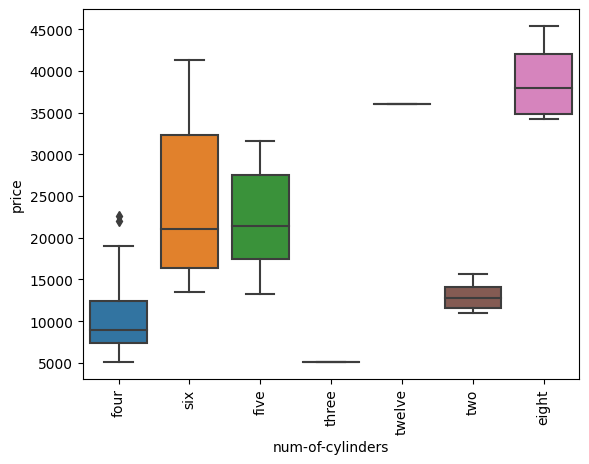

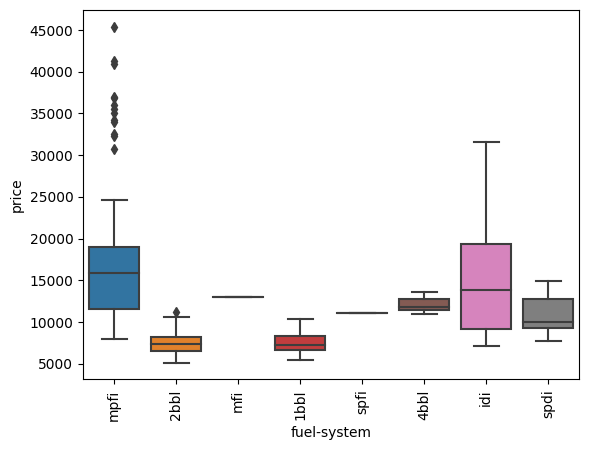

In [165]:
for col in X[ord_cols + hot_encode_cols]:
    sns.boxplot(x = X[col], y = y)
    plt.xticks(rotation = 90)
    plt.show()

# backward elimation with p-values only

In [166]:
from statsmodels.regression.linear_model import OLS

In [167]:
X = num_pipeline.fit_transform(X[num_cols]) # only numerical columns for simplicity
X.shape

(201, 15)

In [181]:
# ones matrix is added to the beginning of the matrix X 
# because the constant is not included in the equation of 
# the multiple linear regression model of the statsmodels library.
X = np.hstack((np.ones((201,1)), X))

- ols statsmodels is use to get the p-values of the features
- backward elimination is a feature selection technique while building a machine learning model. 
- It is used to remove those features that do not have a significant effect on the dependent variable or prediction of output.
- threshold is taken as 0.05, any feature having p-value greater than 0.05 is removed from the model. 
- But only one feature is removed at a time.
- The process continues until we reach an optimized set of features.

In [196]:
o1 = OLS(y.values, X[:, [0,1,2,3,4,5,6,7,8,9,10,12,13,14,15]]).fit()
o1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     75.18
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           1.13e-68
Time:                        15:24:33   Log-Likelihood:                -1899.3
No. Observations:                 201   AIC:                             3829.
Df Residuals:                     186   BIC:                             3878.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.321e+04    225.251     58.633      0.000    1.28e+04    1.37e+04
x1           403.1025    339.905      1.186      0.237    -267.463    1073.668
x2          1034.6390    672.409      1.539      0.126    -291.890    2361.168
x3         -1391.9318    696.224     -1.999      0.047   -2765.443     -18.420
x4          1202.2188    549.710      2.187      0.030     117.750    2286.687
x5           489.0421    357.410      1.368      0.173    -216.056    1194.140
x6           956.7636    907.502      1.054      0.293    -833.557    2747.084
x7          4704.7938    603.446      7.797      0.000    3514.316    5895.272
x8          1185.0687    335.763      3.529      0.001     522.675    1847.462
x9         -2199.2421   1178.388     -1.866      0.064   -4523.966     125.482
x10         1744.8576   1131.737      1.542      0.125    -487.833    3977.548
x11         -948.8714    242.141     -3.919      0.000   -1426.567    -471.176
x12         1367.7969    667.730      2.048      0.042      50.499    2685.095
x13         1172.7234    316.425      3.706      0.000     548.481    1796.966
x14         -152.7698    286.092     -0.534      0.594    -717.172     411.632
==============================================================================
Omnibus:                       22.013   Durbin-Watson:                   0.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.780
Skew:                           0.367   Prob(JB):                     5.20e-15
Kurtosis:                       5.705   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""